In [3]:
# To mount the drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [13]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

In [14]:
classifier = Sequential()

In [15]:
# first convolutional layer
classifier.add(Conv2D(32, 5, 5, input_shape = (256, 256, 3), activation = 'relu',kernel_regularizer=l2(l2=0.01)))
classifier.add(BatchNormalization())

In [16]:
# first pooling layer
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.4))

In [17]:
# second convolutional layer
classifier.add(Conv2D(64, 5,5 ,activation = 'relu', kernel_regularizer= l2(l2=0.01)))
classifier.add(BatchNormalization())


In [18]:
# second pooling layer
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.4))

In [19]:
#Flattening layer
classifier.add(Flatten())

In [20]:
# Full connections
classifier.add(Dense(32, activation='relu'))
classifier.add(Dropout(0.4))
classifier.add(Dense(1, activation='sigmoid'))

In [21]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [1]:
# generate more images
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip =True)

In [2]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
training_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/data/train',
                                                 target_size = (256, 256),
                                                 batch_size = 16,
                                                 class_mode = 'binary')

Found 40 images belonging to 2 classes.


In [23]:
test_set = test_datagen.flow_from_directory('/content/gdrive/MyDrive/data/test',
                                            target_size = (256, 256),
                                            batch_size = 16,
                                            class_mode = 'binary')


Found 20 images belonging to 2 classes.


In [22]:
pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
from livelossplot import PlotLossesKerasTF

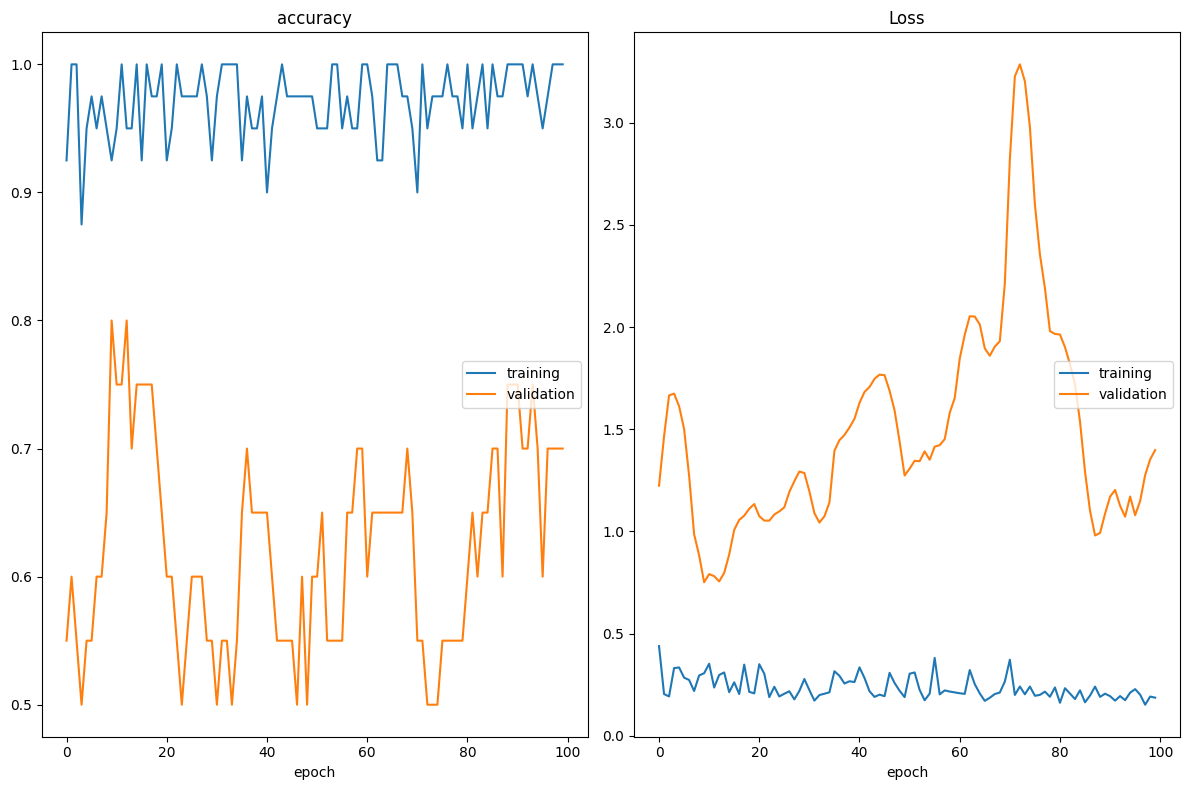

accuracy
	training         	 (min:    0.875, max:    1.000, cur:    1.000)
	validation       	 (min:    0.500, max:    0.800, cur:    0.700)
Loss
	training         	 (min:    0.152, max:    0.439, cur:    0.187)
	validation       	 (min:    0.751, max:    3.285, cur:    1.398)
3/3 [==============================] - 2s 728ms/step - loss: 0.1866 - accuracy: 1.0000 - val_loss: 1.3981 - val_accuracy: 0.7000


In [30]:
classifier.fit(training_set, epochs = 100, validation_data=test_set, callbacks=[PlotLossesKerasTF()])


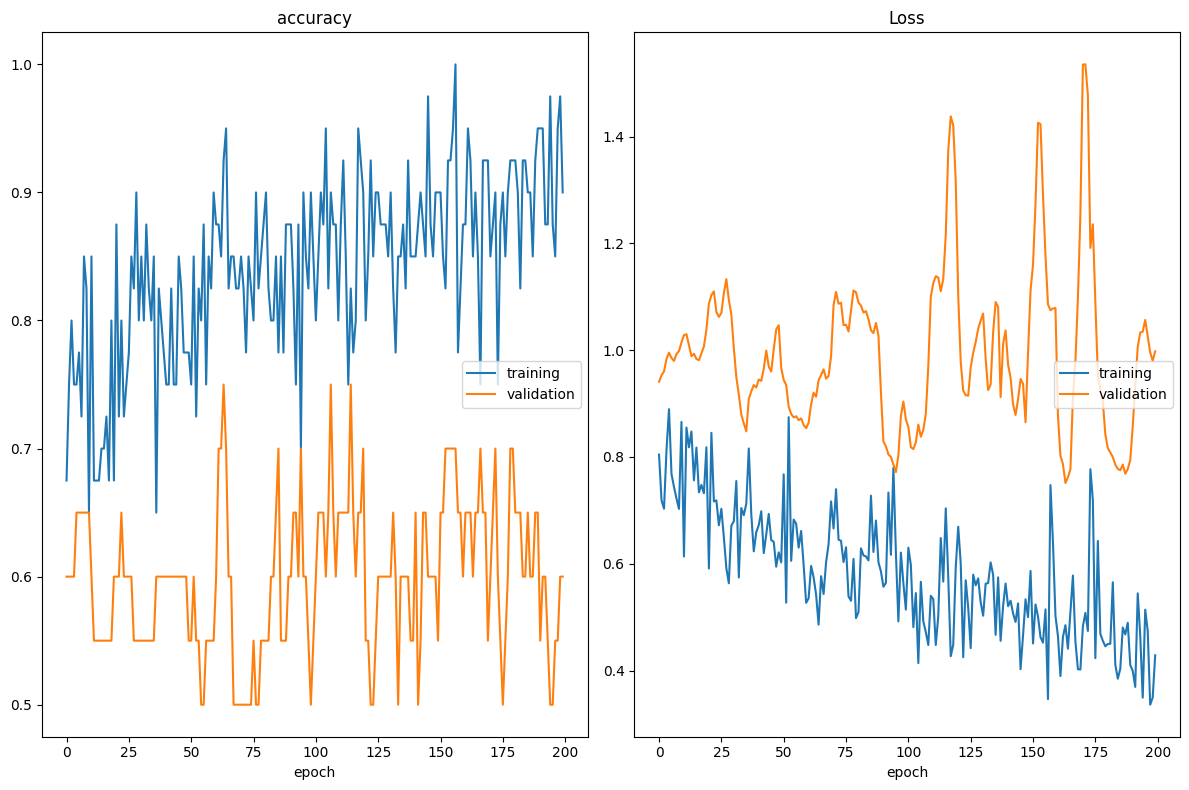

accuracy
	training         	 (min:    0.650, max:    1.000, cur:    0.900)
	validation       	 (min:    0.500, max:    0.750, cur:    0.600)
Loss
	training         	 (min:    0.336, max:    0.889, cur:    0.429)
	validation       	 (min:    0.751, max:    1.535, cur:    0.998)
3/3 [==============================] - 1s 541ms/step - loss: 0.4285 - accuracy: 0.9000 - val_loss: 0.9978 - val_accuracy: 0.6000


In [26]:
classifier.fit(training_set, epochs = 200, validation_data=test_set, callbacks=[PlotLossesKerasTF()])

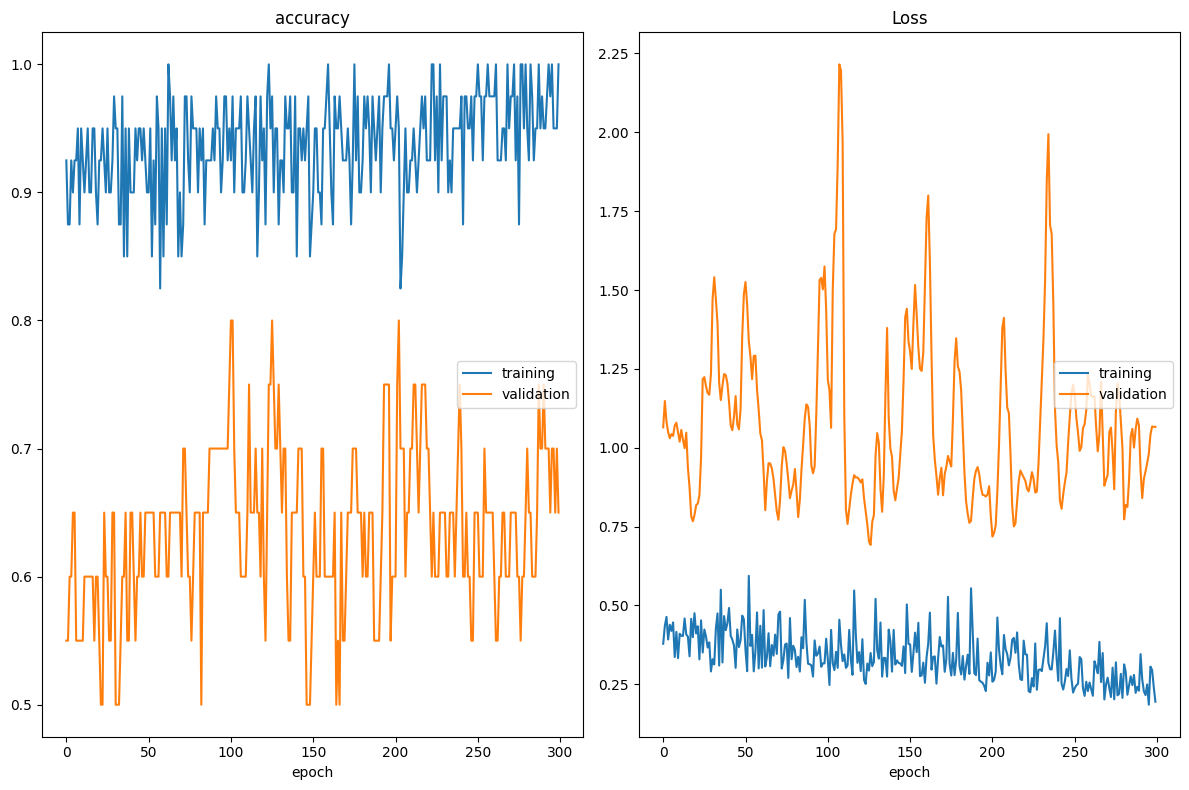

accuracy
	training         	 (min:    0.825, max:    1.000, cur:    1.000)
	validation       	 (min:    0.500, max:    0.800, cur:    0.650)
Loss
	training         	 (min:    0.185, max:    0.594, cur:    0.195)
	validation       	 (min:    0.692, max:    2.215, cur:    1.066)
3/3 [==============================] - 1s 493ms/step - loss: 0.1948 - accuracy: 1.0000 - val_loss: 1.0660 - val_accuracy: 0.6500


In [27]:
classifier.fit(training_set, epochs = 300, validation_data=test_set, callbacks=[PlotLossesKerasTF()])

In [32]:
import numpy as np
# from keras.preprocessing import image
from tensorflow.keras.preprocessing import image

test_image = image.load_img('/content/gdrive/MyDrive/data/test/cats/104.jpg',target_size=(256,256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = classifier.predict(test_image)

if result[0][0]>=0.5:
    prediction= 'Cat'
    print('Result is',result[0][0])
else:
    prediction = 'Dog'
    print('Result is',result[0][0])

print(prediction)

1/1 [==============================] - 0s 21ms/step
Result is 1.0
Cat


In [34]:
import numpy as np
# from keras.preprocessing import image
from tensorflow.keras.preprocessing import image

test_image = image.load_img('/content/gdrive/MyDrive/data/test/dogs/103.jpg',target_size=(256,256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = classifier.predict(test_image)

if result[0][0]>=0.5:
    prediction= 'Cat'
    print('Result is',result[0][0])
else:
    prediction = 'Dog'
    print('Result is',result[0][0])

print(prediction)

1/1 [==============================] - 0s 21ms/step
Result is 1.0
Cat


In [35]:
import numpy as np
# from keras.preprocessing import image
from tensorflow.keras.preprocessing import image

test_image = image.load_img('/content/gdrive/MyDrive/data/test/dogs/109.jpg',target_size=(256,256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = classifier.predict(test_image)

if result[0][0]>=0.5:
    prediction= 'Cat'
    print('Result is',result[0][0])
else:
    prediction = 'Dog'
    print('Result is',result[0][0])

print(prediction)

1/1 [==============================] - 0s 22ms/step
Result is 0.0
Dog
